<a href="https://colab.research.google.com/github/prtk0007/Chest_Xray_detection/blob/main/project_ray_4_VGG16_precision_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 19.2MB/s]



In [ ]:
!unzip \*.zip

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Kaggle/chest_xray/chest_xray/train'
valid_path = '/content/Kaggle/chest_xray/chest_xray/test'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/Kaggle/chest_xray/chest_xray/train/*')
folders

['/content/Kaggle/chest_xray/chest_xray/train/NORMAL',
 '/content/Kaggle/chest_xray/chest_xray/train/PNEUMONIA']

In [8]:
from keras.layers import Dropout
x = Flatten(name='flatten')(vgg.output)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dropout(0.3, name='drop1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.3, name='drop2')(x)
x = Dense(2, activation='softmax', name='predictions')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=x)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(
  loss='categorical_crossentropy',
  optimizer= opt,
  metrics=['accuracy']
)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [14]:
training_set = train_datagen.flow_from_directory('/content/chest_xray/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [16]:
val_set = val_datagen.flow_from_directory('/content/chest_xray/chest_xray/val',
                                            target_size = (224, 224),
                                            class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
82/82 [==============================] - 116s 1s/step - loss: 0.3272 - accuracy: 0.8544 - val_loss: 0.3804 - val_accuracy: 0.8622
Epoch 2/20
82/82 [==============================] - 105s 1s/step - loss: 0.1590 - accuracy: 0.9378 - val_loss: 0.2365 - val_accuracy: 0.9135
Epoch 3/20
82/82 [==============================] - 105s 1s/step - loss: 0.1342 - accuracy: 0.9491 - val_loss: 0.3085 - val_accuracy: 0.9006
Epoch 4/20
82/82 [==============================] - 103s 1s/step - loss: 0.1134 - accuracy: 0.9562 - val_loss: 0.2767 - val_accuracy: 0.9071
Epoch 5/20
82/82 [==============================] - 104s 1s/step - loss: 0.1288 - accuracy: 0.9537 - val_loss: 0.2516 - val_accuracy: 0.9183
Epoch 6/20
82/82 [==============================] - 104s 1s/step - loss: 0.0975 - accuracy: 0.9631 - val_loss: 0.2434 - val_accuracy: 0.9199
Epoch 7/20
82/82 [==============================] - 103s 1s/step - loss: 0.0936 - accuracy: 0.9639 - val_loss: 0.2868 - val_accuracy: 0.9054
Epoch 8/20
82

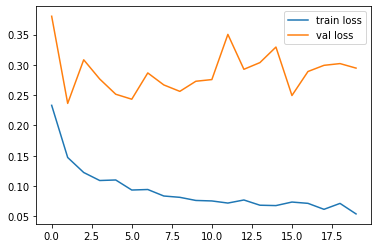

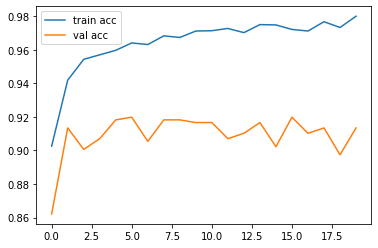

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
model.evaluate(training_set)

82/82 [==============================] - 98s 1s/step - loss: 0.0405 - accuracy: 0.9864


[0.04048258066177368, 0.9863880276679993]

In [19]:
model.evaluate(test_set)

10/10 [==============================] - 6s 573ms/step - loss: 0.2948 - accuracy: 0.9135


[0.29475900530815125, 0.9134615659713745]

In [42]:
%cd /content/drive/MyDrive/Kaggle
%ls

/content/drive/MyDrive/Kaggle
AccVal_acc.png  Inceptv3_xray.h5  LossVal_loss.png  model_vgg19.h5
chest_xray/     kaggle.json       model_vgg16.h5


In [43]:

from keras.models import load_model

model.save('model_vgg16_Precision_85.h5')

In [ ]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

1e-04


In [ ]:
img = image.load_img('/content/Kaggle/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg', target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [ ]:
classes

array([[1., 0.]], dtype=float32)

In [21]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize

In [22]:
TRAIN_DIR = "/content/chest_xray/chest_xray/train/"
TEST_DIR =  "/content/chest_xray/chest_xray/test/"

In [23]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [24]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (224, 224, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [25]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (224, 224, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [26]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 390/390 [00:41<00:00,  9.42it/s]


In [27]:
from keras.utils.np_utils import to_categorical
y_test = to_categorical(y_test, 2)


In [ ]:
print(y_test.shape)

(624, 2)


In [29]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

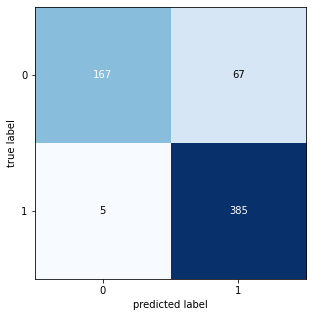

In [30]:
cm = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [31]:
print('True Positive  (TP) = ', cm[1][1])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[0][0])
print('-'*26)

True Positive  (TP) =  385
False Positive (FP) =  67
False Negative (FN) =  5
True Negative  (TN) =  167
--------------------------


In [47]:
if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      accuracy=  round((cm[1][1] + cm[0][0]) / (cm[0][0] + cm[1][0] + cm[0][1] + cm[1][1])*100, 2)
      precision= round((cm[1][1] / (cm[1][1] + cm[0][1]))*100, 2) 
      recall   = round((cm[1][1] / (cm[1][1] + cm[1][0]))*100, 2) 
      f1_score = round(2*((precision*recall)/(precision+recall)), 2)  
      print(f'accuracy Score: {accuracy}%')     
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print(f'F1 Score: {f1_score}%')
      print('='*50) 
      print('\n')

accuracy Score: 88.46%
Precision Score: 85.18%
Recall Score: 98.72%
F1 Score: 91.45%




In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm4= confusion_matrix(y_true, pred)
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       234
           1       0.85      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.85      0.87       624
weighted avg       0.90      0.88      0.88       624

